#IMPORT LIBRARY

In [ ]:
#Import Library
import joblib
import pandas as pd
import numpy as np
import math
from time import time
import pprint
import warnings
warnings.filterwarnings("ignore")

#visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV #cross validation & parameter tuning
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

#SMOTENC
from imblearn.over_sampling import SMOTENC

#modeling
import lightgbm as lgb
from lightgbm import LGBMClassifier, LGBMRegressor, create_tree_digraph

#evaluasi
from sklearn.metrics import accuracy_score, confusion_matrix, auc, roc_auc_score, classification_report #untuk evaluasi metric
from mlxtend.plotting import plot_confusion_matrix

#IMPORT DATASET

In [ ]:
#Import Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/SKRIPSI/diabetes25.csv')

#EXPLORATORY DATA ANALYSIS

In [ ]:
#Exploratory Data Analysis
def eda(dataframe):
    print(f"""

    -- dtypes --

    {dataframe.dtypes}

    -- NaN Values --

    {dataframe.isnull().sum()}

    -- Shape --

    {dataframe.shape}

    -- Head --
    """)


    return dataframe.head()
eda(data)



    -- dtypes --

    Diabetes_binary         int64
HighBP                  int64
HighChol                int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
HvyAlcoholConsump       int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Age                     int64
Education               int64
Income                  int64
dtype: object

    -- NaN Values --

    Diabetes_binary         0
HighBP                  0
HighChol                0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Age                     0
Education               0
Income                  0
dtype: int64

    -- Shape --

    (250

,Diabetes_binary,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Education,Income
0,0,0,0,21,0,0,0,1,0,2,1,0,0,4,5,8
1,0,0,1,35,0,0,0,1,0,1,5,0,0,8,6,8
2,1,0,0,33,0,0,0,0,0,4,0,10,1,11,5,4
3,0,0,0,24,0,0,0,1,0,2,0,0,0,1,6,7
4,0,0,0,32,0,0,0,1,0,3,0,0,0,2,6,7


In [ ]:
# That help us to show the relation between features clearly
data2 = data.copy()
data2["Diabetes_binary_str"]= data2["Diabetes_binary"].replace({0:"Tidak Diabetes",1:"Diabetes"})

data2.Age[data2['Age'] == 1] = '18 - 24'
data2.Age[data2['Age'] == 2] = '25 - 29'
data2.Age[data2['Age'] == 3] = '30 - 34'
data2.Age[data2['Age'] == 4] = '35 - 39'
data2.Age[data2['Age'] == 5] = '40 - 44'
data2.Age[data2['Age'] == 6] = '45 - 49'
data2.Age[data2['Age'] == 7] = '50 - 54'
data2.Age[data2['Age'] == 8] = '55 - 59'
data2.Age[data2['Age'] == 9] = '60 - 64'
data2.Age[data2['Age'] == 10] = '65 - 69'
data2.Age[data2['Age'] == 11] = '70 - 74'
data2.Age[data2['Age'] == 12] = '75 - 79'
data2.Age[data2['Age'] == 13] = '> 80'

data2.Diabetes_binary[data2['Diabetes_binary'] == 0] = 'Tidak Diabetes'
data2.Diabetes_binary[data2['Diabetes_binary'] == 1] = 'Diabetes'

data2.HighBP[data2['HighBP'] == 0] = 'Tidak'
data2.HighBP[data2['HighBP'] == 1] = 'Ya'

data2.HighChol[data2['HighChol'] == 0] = 'Tidak'
data2.HighChol[data2['HighChol'] == 1] = 'Ya'

data2.Smoker[data2['Smoker'] == 0] = 'Tidak'
data2.Smoker[data2['Smoker'] == 1] = 'Ya'

data2.Stroke[data2['Stroke'] == 0] = 'Tidak'
data2.Stroke[data2['Stroke'] == 1] = 'Ya'

data2.HeartDiseaseorAttack[data2['HeartDiseaseorAttack'] == 0] = 'Tidak'
data2.HeartDiseaseorAttack[data2['HeartDiseaseorAttack'] == 1] = 'Ya'

data2.PhysActivity[data2['PhysActivity'] == 0] = 'Tidak'
data2.PhysActivity[data2['PhysActivity'] == 1] = 'Ya'

data2.HvyAlcoholConsump[data2['HvyAlcoholConsump'] == 0] = 'Tidak'
data2.HvyAlcoholConsump[data2['HvyAlcoholConsump'] == 1] = 'Ya'

data2.GenHlth[data2['GenHlth'] == 5] = 'Sangat Baik Sekali'
data2.GenHlth[data2['GenHlth'] == 4] = 'Baik Sekali'
data2.GenHlth[data2['GenHlth'] == 3] = 'Baik'
data2.GenHlth[data2['GenHlth'] == 2] = 'Cukup Baik'
data2.GenHlth[data2['GenHlth'] == 1] = 'Tidak Baik'

data2.DiffWalk[data2['DiffWalk'] == 0] = 'Tidak'
data2.DiffWalk[data2['DiffWalk'] == 1] = 'Ya'

data2.Education[data2['Education'] == 1] = 'Tidak pernah sekolah'
data2.Education[data2['Education'] == 2] = 'SD'
data2.Education[data2['Education'] == 3] = 'SLTP'
data2.Education[data2['Education'] == 4] = 'SLTA'
data2.Education[data2['Education'] == 5] = 'S1/Diploma'
data2.Education[data2['Education'] == 6] = 'Magister'

data2.Income[data2['Income'] == 1] = '< $10,000'
data2.Income[data2['Income'] == 2] = '10,000-$15,000'
data2.Income[data2['Income'] == 3] = '$15,000-$20,000'
data2.Income[data2['Income'] == 4] = '$20,000-$25,000'
data2.Income[data2['Income'] == 5] = '$25,000-$35,000'
data2.Income[data2['Income'] == 6] = '$35,000-$50,000'
data2.Income[data2['Income'] == 7] = '$50,000-$75,000'
data2.Income[data2['Income'] == 8] = '> $75,000'

#STATISTIKA DESKRIPTIF

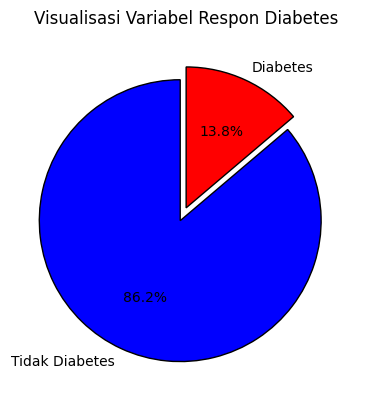

In [ ]:
#Statistika Deskriptif Variabel Respon
l = list(data['Diabetes_binary'].value_counts())
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]

plt.figure(figsize=(10, 15))
plt.subplot(1,2,1)
plt.pie(circle,labels = ['Tidak Diabetes','Diabetes'],autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),colors = ['BLUE','RED'],
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Visualisasi Variabel Respon Diabetes');

In [ ]:
data2.describe() # Untuk fitur numerik (atau continous)

,BMI,MentHlth,PhysHlth
count,25000.000000,25000.000000,25000.000000
mean,28.484680,3.156680,4.216320
std,6.612134,7.368624,8.735899
min,12.000000,0.000000,0.000000
25%,24.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000
75%,31.000000,2.000000,3.000000
max,95.000000,30.000000,30.000000


In [ ]:
#Statistika Deskriptif untuk fitur kategorik
print(data2.HighBP.value_counts()) #HighBP
print(data2.HighChol.value_counts()) #HighChol
print(data2.Smoker.value_counts()) # Smoker
print(data2.Stroke.value_counts()) # Stroke
print(data2.HeartDiseaseorAttack.value_counts()) #HeartDiseaseorAttack
print(data2.PhysActivity.value_counts()) #PhysActivity
print(data2.HvyAlcoholConsump.value_counts()) #HvyAlcoholConsump
print(data2.GenHlth.value_counts()) #GenHlth
print(data2.DiffWalk.value_counts()) #DiffWalk
print(data2.Age.value_counts()) #Age
print(data2.Education.value_counts()) #Education
print(data2.Income.value_counts()) #Income

HighBP
Tidak    14166
Ya       10834
Name: count, dtype: int64
HighChol
Tidak    14323
Ya       10677
Name: count, dtype: int64
Smoker
Tidak    13910
Ya       11090
Name: count, dtype: int64
Stroke
Tidak    23998
Ya        1002
Name: count, dtype: int64
HeartDiseaseorAttack
Tidak    22634
Ya        2366
Name: count, dtype: int64
PhysActivity
Ya       18963
Tidak     6037
Name: count, dtype: int64
HvyAlcoholConsump
Tidak    23597
Ya        1403
Name: count, dtype: int64
GenHlth
Cukup Baik            8797
Baik                  7409
Tidak Baik            4471
Baik Sekali           3123
Sangat Baik Sekali    1200
Name: count, dtype: int64
DiffWalk
Tidak    20778
Ya        4222
Name: count, dtype: int64
Age
60 - 64    3324
65 - 69    3112
55 - 59    2971
50 - 54    2645
70 - 74    2334
45 - 49    1951
> 80       1695
75 - 79    1627
40 - 44    1562
35 - 39    1388
30 - 34    1099
25 - 29     744
18 - 24     548
Name: count, dtype: int64
Education
Magister                10558
S1/Diploma    

#PREPROCESSING DATA

###Uji Multikolinearitas

In [ ]:
def calc_VIF(x):
    vif= pd.DataFrame()
    vif['variables']=x.columns
    vif["VIF"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)


X = add_constant(data)
ds=pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])],index=X.columns)
print(ds)

const                   91.392546
Diabetes_binary          1.197701
HighBP                   1.346996
HighChol                 1.185847
BMI                      1.185177
Smoker                   1.071117
Stroke                   1.078012
HeartDiseaseorAttack     1.169482
PhysActivity             1.132759
HvyAlcoholConsump        1.023525
GenHlth                  1.867795
MentHlth                 1.210646
PhysHlth                 1.560737
DiffWalk                 1.506040
Age                      1.322673
Education                1.310071
Income                   1.434646
dtype: float64


##Menangani Outlier

In [ ]:
# Numerical variables:
num_col = ['BMI','MentHlth','PhysHlth']

# Categorical variables:
cat_col = ['Diabetes_binary','HighBP','HighChol','Smoker','Stroke',
            'HeartDiseaseorAttack','PhysActivity','HvyAlcoholConsump',
            'GenHlth','DiffWalk','Age','Education', 'Income']

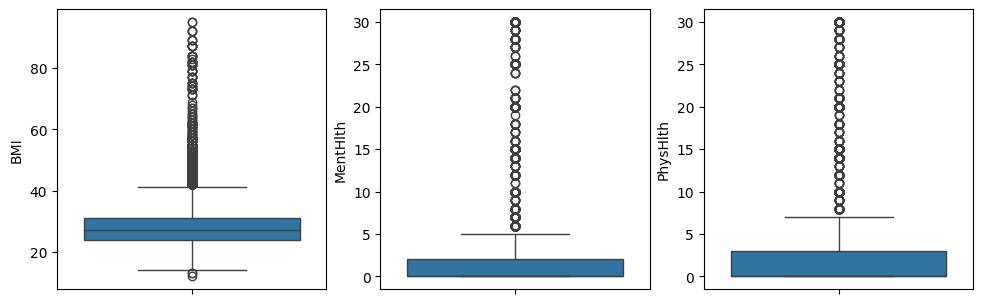

In [ ]:
##Visualisasi untuk deteksi Outlier
plt.figure(figsize = (16,8))
for i,x in enumerate(num_col):
  plt.subplot(2,4,i+1)
  sns.boxplot(data[x])

In [ ]:
#Pendefinisian fungsi IQR
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [ ]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [ ]:
#Pendefinisian fungsi untuk replace outlier
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [ ]:
# Cek Outlier pada variabel numerik
for x in num_col:
  print(x,check_outlier(data,x))

BMI True
MentHlth True
PhysHlth True


In [ ]:
# Replace outlier
for x in num_col:
  replace_with_thresholds(data,x)

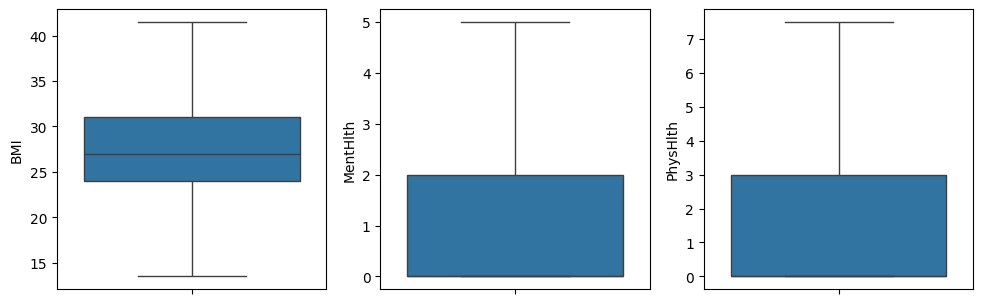

In [ ]:
#Visualisasi setelah penanganan outlier
plt.figure(figsize = (16,8))
for i,x in enumerate(num_col):
  plt.subplot(2,4,i+1)
  sns.boxplot(data[x])

##Menghapus Duplikasi Data

In [ ]:
data.duplicated().sum()

1727

In [ ]:
data.drop_duplicates(inplace = True)
data.duplicated().sum()

0

#SMOTENC

In [ ]:
X=data.drop("Diabetes_binary",axis=1)
Y=data["Diabetes_binary"]

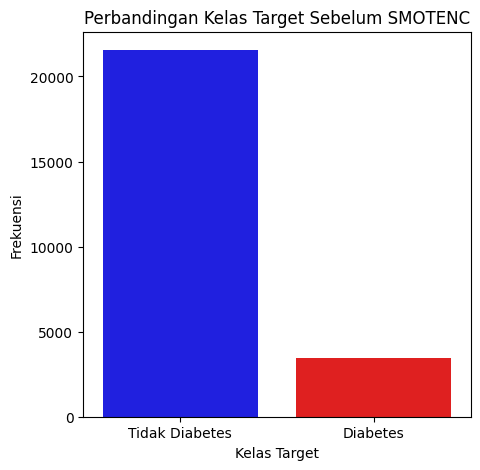

In [ ]:
#Visualisasi Sebelum SMOTENC
plt.figure(figsize=(5, 5))
ax = sns.countplot(x="Diabetes_binary_str", hue="Diabetes_binary", data=data2, palette = ['BLUE','RED'])
plt.title('Perbandingan Kelas Target Sebelum SMOTENC')
plt.xlabel('Kelas Target')
plt.ylabel('Frekuensi')
plt.show()

In [ ]:
#Resampling SMOTENC
cat_cols =[0,1,3,4,5,6,7,8,11,12,13,14]
oversample = SMOTENC(random_state=77, categorical_features=cat_cols)
print("Original Data : ", X.shape, Y.shape)

X_smote, y_smote = oversample.fit_resample(X, Y)
print("Smote Data : ", X_smote.shape, y_smote.shape)

Original Data :  (23273, 15) (23273,)
Smote Data :  (39672, 15) (39672,)


In [ ]:
y_smote.value_counts()

Diabetes_binary
0    19836
1    19836
Name: count, dtype: int64

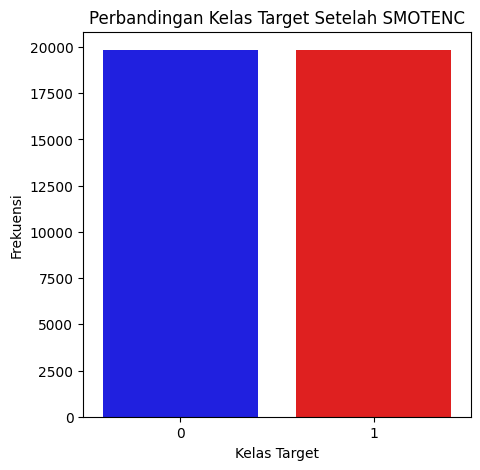

In [ ]:
#Visualisasi Setelah
plt.figure(figsize=(5, 5))
ax=sns.countplot(x=y_smote, data=data2, palette = ['BLUE','RED'])
plt.title('Perbandingan Kelas Target Setelah SMOTENC')
plt.xlabel('Kelas Target')
plt.ylabel('Frekuensi')
plt.show()

#SPLITTING DATA

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, stratify=y_smote, random_state=77)

print("Training Data Shape : ", X_train.shape, y_train.shape)
print("Test Data Shape : ", X_test.shape, y_test.shape)

Training Data Shape :  (27770, 15) (27770,)
Test Data Shape :  (11902, 15) (11902,)


#HYPERPARAMETER TUNING

In [ ]:
# Mendefinisikan parameter grid untuk hyperparameter tuning
param_grid = {'learning_rate':[0.05, 0.08, 0.09],
              'n_estimators': [100, 300, 500],
              'max_depth': [6, 12, 16 ],
              'subsample': [0.1, 0.5, 1.0],
              'min_child_samples': [1, 10, 20],
              'num_leaves': [24, 32, 64]}

In [ ]:
#Inisialisasi LGBMRegressor estimattor
estimator = lgb.LGBMRegressor(objective='binary',
                              random_state=77)

In [ ]:
# Inisialisasi Grid Search dengan 3-fold cross validation and fit model .
model = GridSearchCV(estimator=estimator,
                     param_grid=param_grid,
                     cv=3, n_jobs=-1,
                     scoring='neg_root_mean_squared_error')
model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 13885, number of negative: 13885
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003598 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 568
[LightGBM] [Info] Number of data points in the train set: 27770, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


GridSearchCV(cv=3, estimator=LGBMRegressor(objective='binary', random_state=77),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.08, 0.09],
                         'max_depth': [6, 12, 16],
                         'min_child_samples': [1, 10, 20],
                         'n_estimators': [100, 300, 500],
                         'num_leaves': [24, 32, 64],
                         'subsample': [0.1, 0.5, 1.0]},
             scoring='neg_root_mean_squared_error')

In [ ]:
# Step 4: Print best parameters
best_params = model.best_estimator_
print(best_params)

LGBMRegressor(learning_rate=0.09, max_depth=16, min_child_samples=1,
              n_estimators=500, num_leaves=64, objective='binary',
              random_state=77, subsample=0.1)


#KLASIFIKASI SMOTENC-LGBM

In [ ]:
lgbm = LGBMClassifier(learning_rate=0.09, max_depth=16, min_child_samples=1,
              n_estimators=500, num_leaves=64, objective='binary',
              random_state=77, subsample=0.1)
lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 13885, number of negative: 13885
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005555 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 568
[LightGBM] [Info] Number of data points in the train set: 27770, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(learning_rate=0.09, max_depth=16, min_child_samples=1,
               n_estimators=500, num_leaves=64, objective='binary',
               random_state=77, subsample=0.1)

In [ ]:
y_pred=lgbm.predict(X_test)

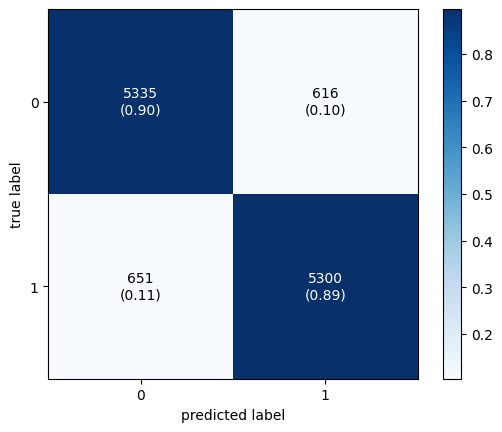

In [ ]:
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

#EVALUASI MODEL

In [ ]:
print('Training set score: {:.4f}'.format(lgbm.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(lgbm.score(X_test, y_test)))

Training set score: 0.9774
Test set score: 0.8935


In [ ]:
matrix = classification_report(y_test,y_pred)
print(matrix)

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      5951
           1       0.90      0.89      0.89      5951

    accuracy                           0.89     11902
   macro avg       0.89      0.89      0.89     11902
weighted avg       0.89      0.89      0.89     11902



In [ ]:
from sklearn.metrics import auc, roc_curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
score = auc(fpr, tpr)
print(f"ROC AUC: {score:.4f}")

ROC AUC: 0.8935


#DIAGRAM POHON KLASIFIKASI

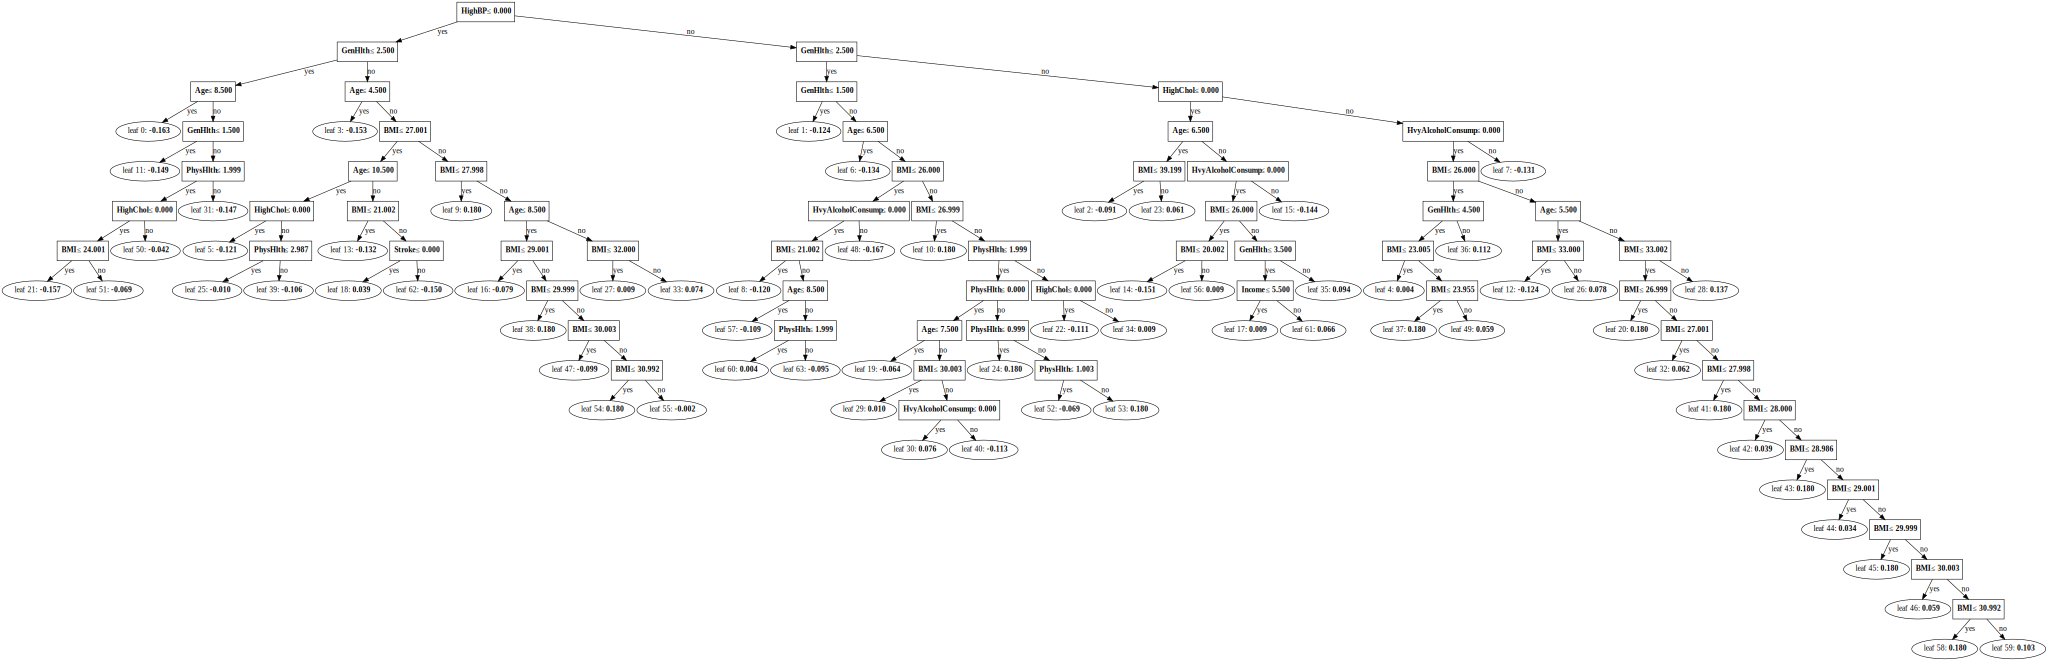

In [ ]:
lgb.create_tree_digraph(lgbm, orientation='vertical')

#PERBANDINGAN MODEL TANPA SMOTENC

###Splitting dataset

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,Y, test_size=0.3, stratify=Y, random_state=77)

print("Training Data Shape : ", X_train1.shape, y_train1.shape)
print("Test Data Shape : ", X_test1.shape, y_test1.shape)

Training Data Shape :  (16291, 15) (16291,)
Test Data Shape :  (6982, 15) (6982,)


###Tuning Hyperparameter

In [ ]:
model.fit(X_train1, y_train1)

[LightGBM] [Info] Number of positive: 2406, number of negative: 13885
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002648 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 97
[LightGBM] [Info] Number of data points in the train set: 16291, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.147689 -> initscore=-1.752844
[LightGBM] [Info] Start training from score -1.752844


GridSearchCV(cv=3, estimator=LGBMRegressor(objective='binary', random_state=77),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.08, 0.09],
                         'max_depth': [6, 12, 16],
                         'min_child_samples': [1, 10, 20],
                         'n_estimators': [100, 300, 500],
                         'num_leaves': [24, 32, 64],
                         'subsample': [0.1, 0.5, 1.0]},
             scoring='neg_root_mean_squared_error')

In [ ]:
# Step 4: Print best parameters
best_params1 = model.best_estimator_
print(best_params1)

LGBMRegressor(learning_rate=0.05, max_depth=6, num_leaves=24,
              objective='binary', random_state=77, subsample=0.1)


###Klasifikasi LGBM

In [ ]:
lgb = LGBMClassifier(learning_rate=0.05, max_depth=6, num_leaves=24,
              objective='binary', random_state=77, subsample=0.1)
lgb.fit(X_train1, y_train1)

[LightGBM] [Info] Number of positive: 2406, number of negative: 13885
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002537 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 97
[LightGBM] [Info] Number of data points in the train set: 16291, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.147689 -> initscore=-1.752844
[LightGBM] [Info] Start training from score -1.752844


LGBMClassifier(learning_rate=0.05, max_depth=6, num_leaves=24,
               objective='binary', random_state=77, subsample=0.1)

In [ ]:
y_pred1=lgb.predict(X_test1)

#Akurasi model LGBM
print('Training set score: {:.4f}'.format(lgb.score(X_train1, y_train1)))

print('Test set score: {:.4f}'.format(lgb.score(X_test1, y_test1)))

Training set score: 0.8641
Test set score: 0.8588


In [ ]:
fpr, tpr, _ = roc_curve(y_test1, y_pred1)
score = auc(fpr, tpr)
print(f"ROC AUC: {score:.4f}")

ROC AUC: 0.5647


#PERBANDINGAN SMOTENC-LGBM TANPA HYPERPARAMETER TUNING

In [ ]:
lgbm = LGBMClassifier(learning_rate=0.1, max_depth=9, min_child_samples=20,
                      n_estimators=100,num_leaves=31, objective='binary',
                      random_state=77,subsample=1.0)
lgbm.fit(X_train, y_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 13885, number of negative: 13885
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004646 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 568
[LightGBM] [Info] Number of data points in the train set: 27770, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(max_depth=9, objective='binary', random_state=77)

In [ ]:
y_pred2=lgb.predict(X_test)

#Akurasi model LGBM
print('Training set score: {:.4f}'.format(lgb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(lgb.score(X_test, y_test)))

Training set score: 0.5817
Test set score: 0.5807


In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred2)
score = auc(fpr, tpr)
print(f"ROC AUC: {score:.4f}")

ROC AUC: 0.5807
